Time and data are rather interesting from this method's perspective. There have always been attempts to use time and data in trading systems. In our models, taking into account some hidden data on the quotes dependency on the time of day and day of the week can be revealed by the classification models automatically. The only thing to do here is to convert these two variables into the categorical form. The time is to become a category with 24 levels and the date is to become a categorical variable with five levels to match the number of week days.

Besides the source predictors, we are going to create additional predictors, which, in my opinion reveal existence of trends in the source quotes. We are going to use well known indicators to create additional predictors.

The following indicators are going to be employed: 5,10 and 15; MACD(12,26,9), RSI with periods 14,21,28. On top of them we are going to use increments of quotes and moving averages. All of these conversions are to be applied to all six quotes of the currency pairs.



	RSI = 100 - 100/(1 + RS*)

*Where RS = Average of x days' up closes / Average of x days' down closes.

Explanation of implementation
https://en.wikipedia.org/wiki/Relative_strength_index

The MACD is calculated by subtracting the 26-day exponential moving average (EMA) from the 12-day EMA

Read more: Moving Average Convergence Divergence (MACD) Definition | Investopedia http://www.investopedia.com/terms/m/macd.asp#ixzz4A3ilHZtW
Follow us: Investopedia on Facebook


The following indicators are going to be employed: 5,10 and 15 EMA; MACD(12,26,9), RSI with periods 14,21,28. On top of them we are going to use increments of quotes and moving averages. All of these conversions are to be applied to all six quotes of the currency pairs.

In [153]:
import numpy as np
from scipy.signal import argrelextrema
from matplotlib import pyplot
import pandas as pd
import pandas.io.data as web
%matplotlib inline

In [154]:
XD = web.get_data_yahoo('F')['Close'] 

In [155]:
def MACD(y, a=26, b=12):
    return pd.ewma(y, span=12) - pd.ewma(y, span=26) #12-26

In [156]:
def RSI(y, windown=14):
    dy = y.diff()
    dy.iat[0] = dy.iat[1]
    u = dy.apply(lambda x: x if (x > 0) else 0) # uptrend 0 with where it goes down
    d = dy.apply(lambda x: -x if (x < 0) else 0) # downtred 0 with where it goes up
    # simple exponential moving average
    rs = pd.ewma(u, span=windown)/pd.ewma(d, span=windown)
    return 100 - (100/(1+rs))

/home/andre/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:7: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(min_periods=0,span=14,ignore_na=False,adjust=True).mean()
/home/andre/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(min_periods=0,span=12,ignore_na=False,adjust=True).mean()
  from ipykernel import kernelapp as app
/home/andre/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(min_periods=0,span=26,ignore_na=False,adjust=True).mean()
  from ipykernel import kernelapp as app


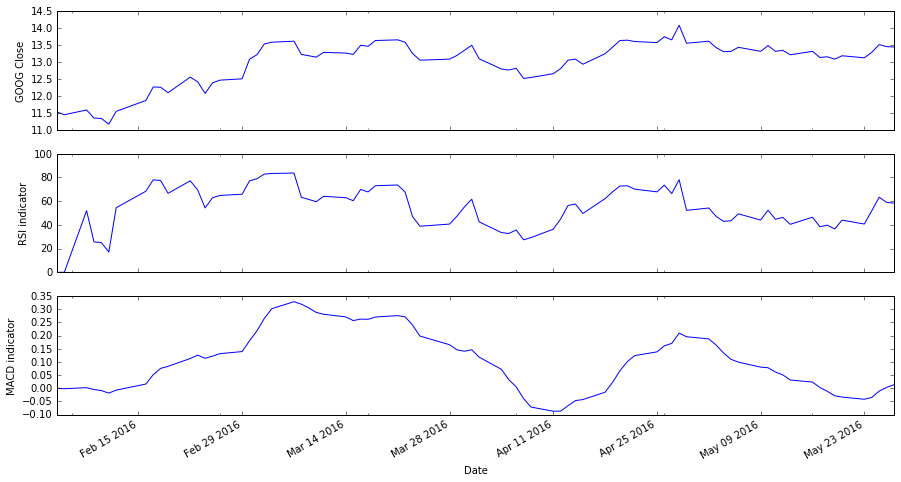

In [159]:
X = pd.DataFrame(XD).iloc[-80::,:]
#X = pd.read_pickle('GOOG_may_29.pandas')
fig, arx = pyplot.subplots(3, sharex=True, figsize=(15,8))
X['Close'].plot(ax=arx[0])
arx[0].set_ylabel('GOOG Close')
X['Close_RSI'] = RSI(X['Close'])
X['Close_RSI'].plot(ax=arx[1])
arx[1].set_ylim(0, 100)
arx[1].set_ylabel('RSI indicator')
X['Close_MACD'] = MACD(X['Close'])
X['Close_MACD'].plot(ax=arx[2])
arx[2].set_ylabel('MACD indicator')

In [1]:
import pandas as pd
from matplotlib import pyplot
import seaborn as sns
%matplotlib inline
#pyplot.figure()

def plot_quotes(df):    
    sns.set_context("talk")
    quotes = list(df.columns[1:]) # ignore first collumn
    f, axr = pyplot.subplots(len(quotes), sharex=True, figsize=(15,15))
    for i, ax in enumerate(axr):
        df.iloc[:,i+1].plot(ax=axr[i])
        axr[i].set_ylabel(quotes[i])

In [2]:
df = pd.read_pickle('cotes_21hs_29_may_16_6hours.pandas')

In [23]:
df2 = df.copy()
del df2['USD/JPY']
#df2.consolidate?

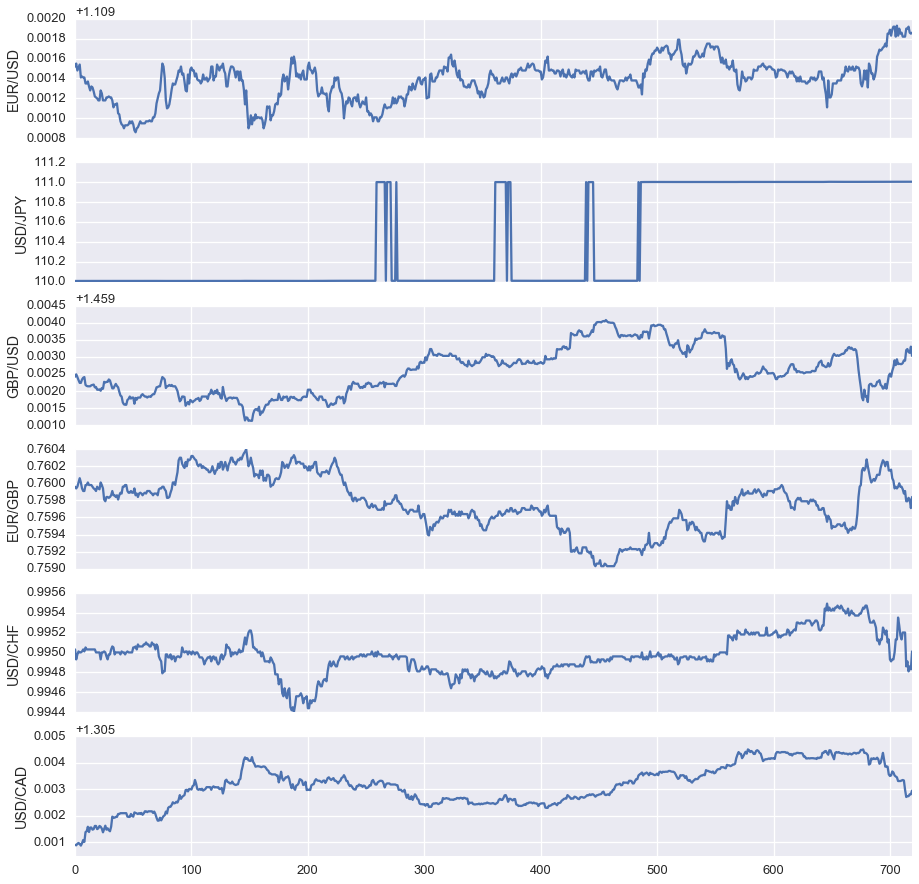

In [3]:
plot_quotes(df)

### UNNECESSARY .... found trying to do RSI ... ###

In [5]:
import numpy as np
from scipy.signal import argrelextrema
from matplotlib import pyplot
%matplotlib inline
x = X['Close'].values
# for local maxima indexes
maxx = argrelextrema(x, np.greater)
# for local minima indexes
maxy = argrelextrema(x, np.less)

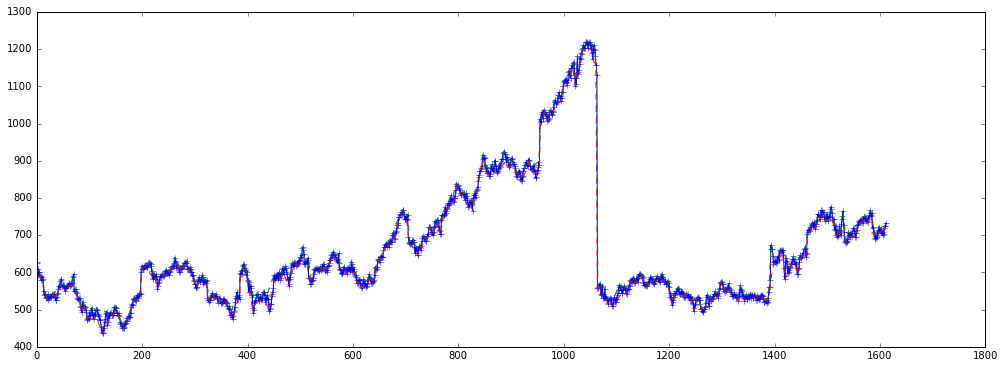

In [4]:
pyplot.figure(figsize=(17,6))
pyplot.plot(x, '+-')
pyplot.plot(maxx[0], x[maxx[0]], '--')
pyplot.plot(maxy[0], x[maxy[0]], '--')
pyplot.plot(maxx[0])